In [1]:
# Import libraries
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import statistics

In [2]:
# Set filepath

# repository='/home/ebb505/ARE_Project/are-logs/BL/'
# experimentName = "BL"

repository='/home/ebb505/ARE_Project/are-logs/NS/'
experimentName = "NS"

# repository='/home/ebb505/ARE_Project/are-logs/GRi/'
# experimentName = "GRi"

filename='norepmorphdesc.csv'

In [3]:
# Get all directories
folders = []
# r=root, d=directories, f = files
for r, d, f in os.walk(repository):
    for folder in d:
        folders.append(os.path.join(r, folder))
print("Folders: ", len(folders))

Folders:  18


In [4]:
# Get information from files
my_replicates = []
for f in folders:
    my_list = []
    with open(f + '/' + filename, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in data:
            my_list.append(row[:-1]) # Last character is empty for some reason
    my_replicates.append(my_list)

In [5]:
population = 40
#replicates = len(my_replicates)
replicates = 15
evaluations = len(my_replicates[0])
#evaluations = 20000
features = len(my_replicates[0][0])
generations = int(evaluations / population)
print("Replicates: ", replicates, "Evaluations: ", evaluations, "Features: ", features, "Generations: ", generations)

Replicates:  15 Evaluations:  9624 Features:  7 Generations:  240


In [6]:
# Process data
repRes = []
for rep in range(replicates):
    dat = np.array([[float(y) for y in x] for x in my_replicates[rep]]) # Convert to array
    repRes.append(dat)
print("Done!")

Done!


In [7]:
repDist = []
for rep in range(1):
    temAve = []
    for i in range(len(repRes[0])):
        temDis = []
        for j in range(len(repRes[0])):
            dist = np.linalg.norm(repRes[rep][i][1:]-repRes[rep][j][1:])
            temDis.append(dist)
        sortedList = np.sort(temDis)
        temAve.append(np.mean(sortedList[:14]))
        if(i % 1000 == 0):
            print(i)         
    repDist.append(np.mean(temAve))
    print(rep)
print("Done!")

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
0
Done!


In [8]:
print(sortedList)

[0.00000000e+00 1.44676000e-04 2.17014000e-04 ... 1.61254086e+00
 1.61873037e+00 1.62181627e+00]


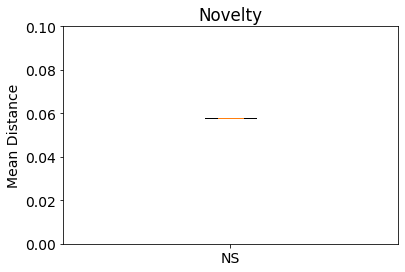

In [9]:
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)

# Plot box plot stuff
plt.boxplot([repDist], notch=True)
#Label and stuff
axes = plt.gca()
axes.set_ylim([0,0.1])
plt.ylabel('Mean Distance')
plt.title("Novelty")
rangeX = [experimentName] 
posX = [1]
plt.xticks(posX,rangeX)
plt.savefig(repository+experimentName+'meanDistAll.png', dpi=200)